In [4]:
from jaxnn import dataset
from jaxnn.model import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

In [5]:
dataloader, cls_map = dataset.mnist_dataloader('train', batch_size=256)

In [6]:
model = Model([
    nn.flatten(),
    nn.dense(256),
    nn.relu(),
    nn.dropout(),
    # nn.dense(64),
    # nn.relu(),
    nn.dense(10),
    nn.softmax()
])
model.fit(data_loader=dataloader,
          optimizer=optimizers.sgd(lr=1e-1),
          loss_fn=loss.categorical_cross_entropy(from_logits=False),
          epochs=50,
          metrics=['accuracy'])


epoch: [  1\50 -------------------- loss: 0.835 valid loss: 0.841 valid accuracy: 0.754
epoch: [  2\50 -------------------- loss: 0.516 valid loss: 0.520 valid accuracy: 0.847
epoch: [  3\50 #------------------- loss: 0.428 valid loss: 0.431 valid accuracy: 0.874
epoch: [  4\50 #------------------- loss: 0.375 valid loss: 0.376 valid accuracy: 0.891
epoch: [  5\50 ##------------------ loss: 0.336 valid loss: 0.352 valid accuracy: 0.898
epoch: [  6\50 ##------------------ loss: 0.305 valid loss: 0.331 valid accuracy: 0.905
epoch: [  7\50 ##------------------ loss: 0.280 valid loss: 0.309 valid accuracy: 0.913
epoch: [  8\50 ###----------------- loss: 0.258 valid loss: 0.298 valid accuracy: 0.914
epoch: [  9\50 ###----------------- loss: 0.240 valid loss: 0.284 valid accuracy: 0.920
epoch: [ 10\50 ####---------------- loss: 0.224 valid loss: 0.271 valid accuracy: 0.922
epoch: [ 11\50 ####---------------- loss: 0.210 valid loss: 0.270 valid accuracy: 0.923
epoch: [ 12\50 ####-------------

In [7]:
x, y = dataset.mnist_testdata()
x = x / 255.

In [8]:
y_hat = model.predict(x)
model.accuracy(y_hat, y)

DeviceArray(0.9379, dtype=float32)

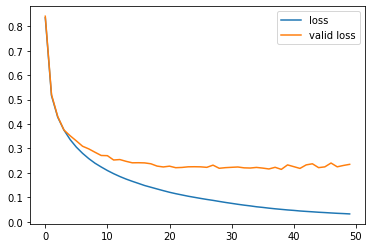

In [9]:
l1, = plt.plot(model.losses)
l2, = plt.plot(model.valid_losses)
plt.legend([l1, l2], ['loss', 'valid loss'])
plt.show()

In [10]:
y_hat = model.predict(x[:10])

In [11]:
jnp.argmax(y_hat, axis=1), y[:10]

(DeviceArray([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int32),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))